In [359]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from tensorflow.keras import layers
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [360]:
img = cv2.imread("Cat1/1.jpg")
type(img)

numpy.ndarray

In [361]:
path_cat = 'Cat1/'
path_dog = 'Dog1/'

In [362]:
path_cat = 'Cat1'
path_dog = 'Dog1'

data = []
labels = []


In [363]:
cat_images = os.listdir(path_cat)
for image_name in cat_images:
    image_path = os.path.join(path_cat, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (150, 150))
    image = image.astype('float32') / 255.0
    data.append(image)
    labels.append('cat')


In [364]:
dog_images = os.listdir(path_dog)
for image_name in dog_images:
    image_path = os.path.join(path_dog, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (150, 150))
    image = image.astype('float32') / 255.0
    data.append(image)
    labels.append('dog')


In [365]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [366]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [367]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [368]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


80
20
80
20


In [369]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

In [370]:
# Dodawanie warstw gęstych
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Warstwa wyjściowa z dwoma neuronami (kot i pies)

In [371]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [372]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 17, 17, 128)    

In [373]:
results = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 2s 387ms/step - loss: 0.8673 - accuracy: 0.5000 - val_loss: 0.6630 - val_accuracy: 0.6000
Epoch 2/20
3/3 [==============================] - 1s 302ms/step - loss: 0.7115 - accuracy: 0.5875 - val_loss: 0.7154 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 1s 296ms/step - loss: 0.6942 - accuracy: 0.5250 - val_loss: 0.7206 - val_accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 1s 299ms/step - loss: 0.6925 - accuracy: 0.5250 - val_loss: 0.7093 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 1s 318ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 1s 326ms/step - loss: 0.6856 - accuracy: 0.5250 - val_loss: 0.7069 - val_accuracy: 0.4000
Epoch 7/20
3/3 [==============================] - 1s 305ms/step - loss: 0.6816 - accuracy: 0.5250 - val_loss: 0.7158 - val_accuracy: 0.4000
Epoch 8/20
3/3 [====

In [374]:
print(classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

1/1 [==============================] - 0s 124ms/step
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.58      0.88      0.70         8

    accuracy                           0.70        20
   macro avg       0.73      0.73      0.70        20
weighted avg       0.76      0.70      0.70        20



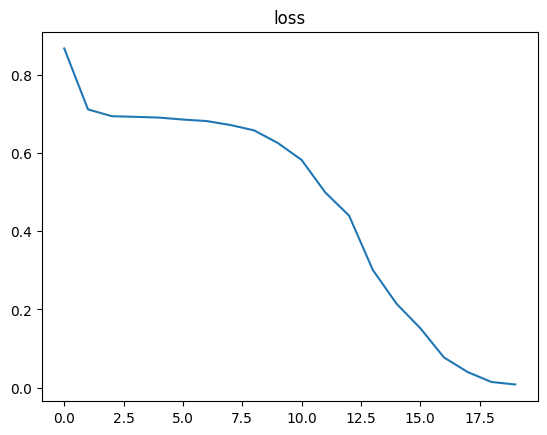

In [375]:
plt.plot(results.history["loss"])
plt.title("loss")
plt.show()

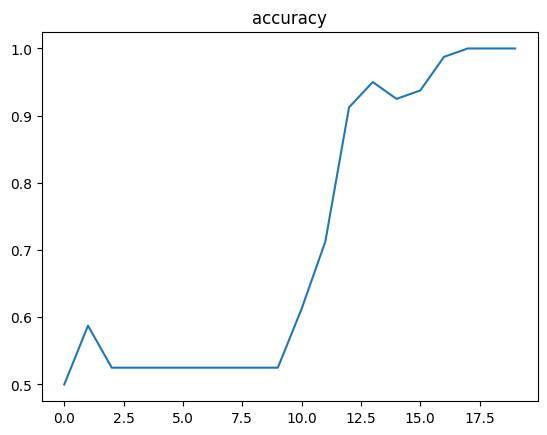

In [376]:
plt.plot(results.history["accuracy"])
plt.title("accuracy")
plt.show()